In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from tensorflow.keras import Sequential,Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense,Flatten,SimpleRNN,GRU,LSTM

## Data Preparation

In [3]:
series= np.sin((0.1*np.arange(400))**2)

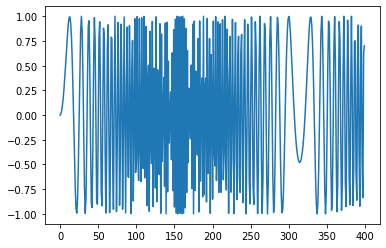

In [4]:
plt.plot(series)

In [5]:
T=10
D=1
X=[]
Y=[]

for t in range(len(series)-T):
    x=series[t:t+T]
    X.append(x)
    y=series[t+T]
    Y.append(y)

print(X[0])
print(Y[0])

[0.         0.00999983 0.03998933 0.08987855 0.15931821 0.24740396
 0.35227423 0.47062589 0.59719544 0.72428717]
0.8414709848078965


In [6]:
X=np.array(X).reshape(-1,T,1) ##To keep data in N x T x D
Y=np.array(Y)
N=len(X)
print(f'X shape {X.shape} and Y Shape {Y.shape}')

X shape (390, 10, 1) and Y Shape (390,)


In [11]:
## Simple RNN

model= Sequential()

model.add(Input(shape=(T,D)))

model.add(SimpleRNN(10))

model.add(Dense(1))

In [9]:
model.compile(loss='mse',optimizer=Adam(learning_rate=0.1))
model.fit(X[:-N//2],Y[:-N//2],epochs=150,validation_data=(X[-N//2:],Y[-N//2:]))

Epoch 1/150
7/7 [==============================] - 3s 76ms/step - loss: 1.1145 - val_loss: 0.5212
Epoch 2/150
7/7 [==============================] - 0s 11ms/step - loss: 0.5520 - val_loss: 0.5285
Epoch 3/150
7/7 [==============================] - 0s 14ms/step - loss: 0.5819 - val_loss: 0.6070
Epoch 4/150
7/7 [==============================] - 0s 14ms/step - loss: 0.5695 - val_loss: 0.6393
Epoch 5/150
7/7 [==============================] - 0s 10ms/step - loss: 0.5511 - val_loss: 0.5679
Epoch 6/150
7/7 [==============================] - 0s 10ms/step - loss: 0.5386 - val_loss: 0.6529
Epoch 7/150
7/7 [==============================] - 0s 10ms/step - loss: 0.4551 - val_loss: 0.6082
Epoch 8/150
7/7 [==============================] - 0s 15ms/step - loss: 0.4033 - val_loss: 0.6014
Epoch 9/150
7/7 [==============================] - 0s 17ms/step - loss: 0.4664 - val_loss: 0.5897
Epoch 10/150
7/7 [==============================] - 0s 15ms/step - loss: 0.5536 - val_loss: 0.4875
Epoch 11/150
7/7 [=

<AxesSubplot:>

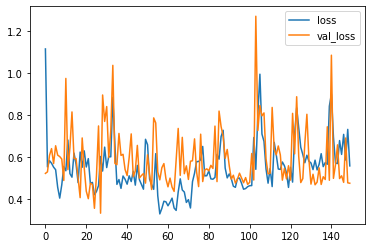

In [10]:
losses=pd.DataFrame(model.history.history)
losses.plot()

In [15]:
## LSTM

model= Sequential()

model.add(Input(shape=(T,D)))

model.add(LSTM(10))

model.add(Dense(1))

In [13]:
model.compile(loss='mse',optimizer=Adam(learning_rate=0.1))
model.fit(X[:-N//2],Y[:-N//2],epochs=150,validation_data=(X[-N//2:],Y[-N//2:]))

Epoch 1/150
7/7 [==============================] - 4s 157ms/step - loss: 0.5154 - val_loss: 0.5561
Epoch 2/150
7/7 [==============================] - 0s 17ms/step - loss: 0.4438 - val_loss: 0.6166
Epoch 3/150
7/7 [==============================] - 0s 14ms/step - loss: 0.3688 - val_loss: 0.6291
Epoch 4/150
7/7 [==============================] - 0s 15ms/step - loss: 0.2590 - val_loss: 0.4534
Epoch 5/150
7/7 [==============================] - 0s 15ms/step - loss: 0.2878 - val_loss: 0.4280
Epoch 6/150
7/7 [==============================] - 0s 19ms/step - loss: 0.2120 - val_loss: 0.3567
Epoch 7/150
7/7 [==============================] - 0s 15ms/step - loss: 0.1615 - val_loss: 0.2833
Epoch 8/150
7/7 [==============================] - 0s 14ms/step - loss: 0.1307 - val_loss: 0.3252
Epoch 9/150
7/7 [==============================] - 0s 19ms/step - loss: 0.1276 - val_loss: 0.2719
Epoch 10/150
7/7 [==============================] - 0s 20ms/step - loss: 0.0911 - val_loss: 0.2212
Epoch 11/150
7/7 [

<AxesSubplot:>

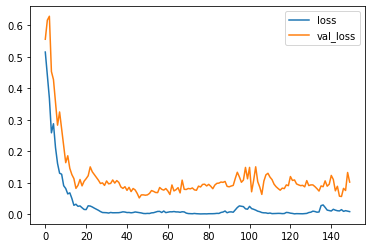

In [14]:
losses=pd.DataFrame(model.history.history)
losses.plot()

In [16]:
## GRU 

model= Sequential()

model.add(Input(shape=(T,D)))

model.add(GRU(10))

model.add(Dense(1))

In [17]:
model.compile(loss='mse',optimizer=Adam(learning_rate=0.1))
model.fit(X[:-N//2],Y[:-N//2],epochs=150,validation_data=(X[-N//2:],Y[-N//2:]))

Epoch 1/150
7/7 [==============================] - 4s 125ms/step - loss: 0.6383 - val_loss: 0.5926
Epoch 2/150
7/7 [==============================] - 0s 14ms/step - loss: 0.5174 - val_loss: 0.5802
Epoch 3/150
7/7 [==============================] - 0s 15ms/step - loss: 0.4845 - val_loss: 0.5741
Epoch 4/150
7/7 [==============================] - 0s 15ms/step - loss: 0.4449 - val_loss: 0.4404
Epoch 5/150
7/7 [==============================] - 0s 14ms/step - loss: 0.2968 - val_loss: 0.4238
Epoch 6/150
7/7 [==============================] - 0s 14ms/step - loss: 0.2000 - val_loss: 0.2014
Epoch 7/150
7/7 [==============================] - 0s 15ms/step - loss: 0.0983 - val_loss: 0.2750
Epoch 8/150
7/7 [==============================] - 0s 18ms/step - loss: 0.0840 - val_loss: 0.1942
Epoch 9/150
7/7 [==============================] - 0s 18ms/step - loss: 0.1036 - val_loss: 0.1656
Epoch 10/150
7/7 [==============================] - 0s 14ms/step - loss: 0.0714 - val_loss: 0.1389
Epoch 11/150
7/7 [

<AxesSubplot:>

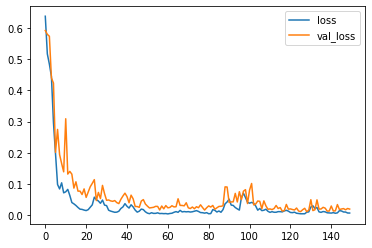

In [18]:
losses=pd.DataFrame(model.history.history)
losses.plot()